In [23]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
AIRLINE_STATS_CSV = 'data/airline_stats.csv'
KC_TAX_CSV = 'data/kc_tax.csv.gz'
LC_LOANS_CSV = 'data/lc_loans.csv'
AIRPORT_DELAYS_CSV = 'data/dfw_airline.csv'
SP500_DATA_CSV = 'data/sp500_data.csv.gz'
SP500_SECTORS_CSV = 'data/sp500_sectors.csv'
STATE_CSV = 'data/state.csv'

# Air Line dataset

In [18]:
air = pd.read_csv(AIRLINE_STATS_CSV)
air.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [19]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


### From data.info() function we can see that 
1. 3 columns are Numeric -- Continous columns
2. 1 column is categorical column

### To further find the type of the categorical column we us value_counts() function

In [20]:
air.airline.value_counts()

Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: airline, dtype: int64

### We can see that there are 6 categories in the airline categorical column and it is nomial as there is no order in the categories.

# Null Values

In [21]:
print(air.isnull().sum())
air = air.dropna()
air.isnull().sum()

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64


pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

# 1. Univariate Analysis

## Estimates of location

In [9]:
air.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


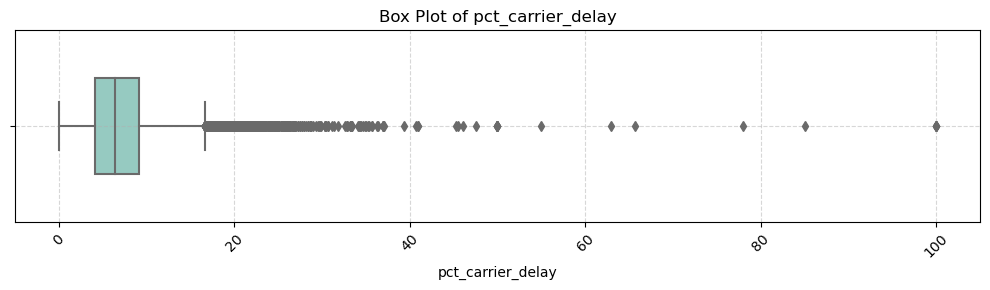

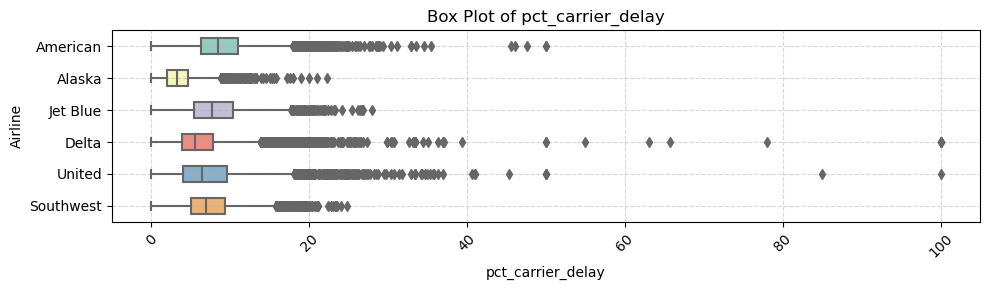

Number of outliers: 961


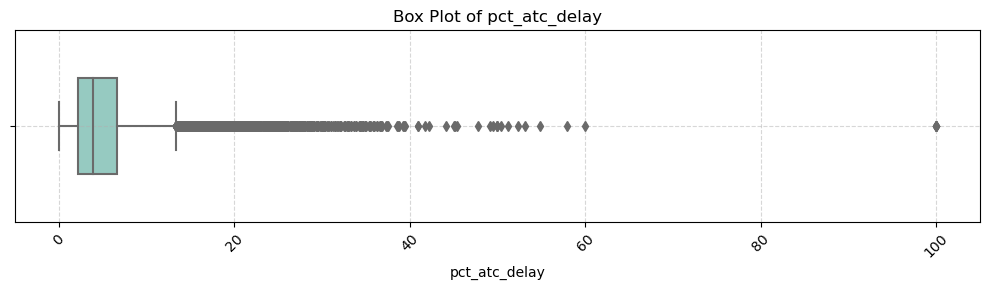

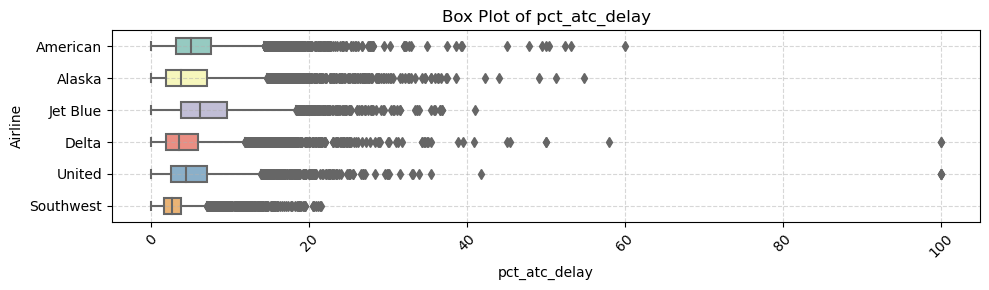

Number of outliers: 1781


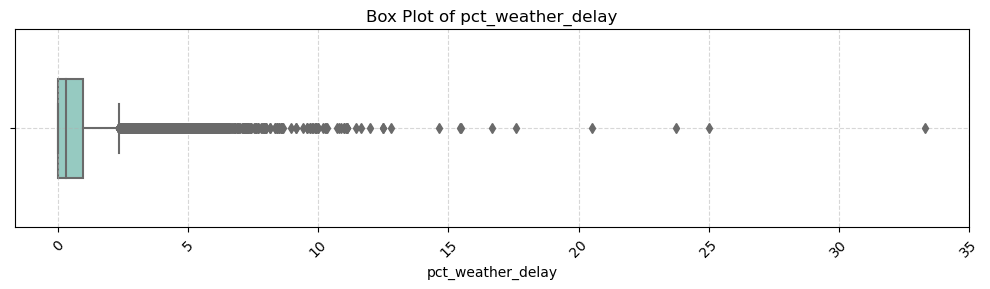

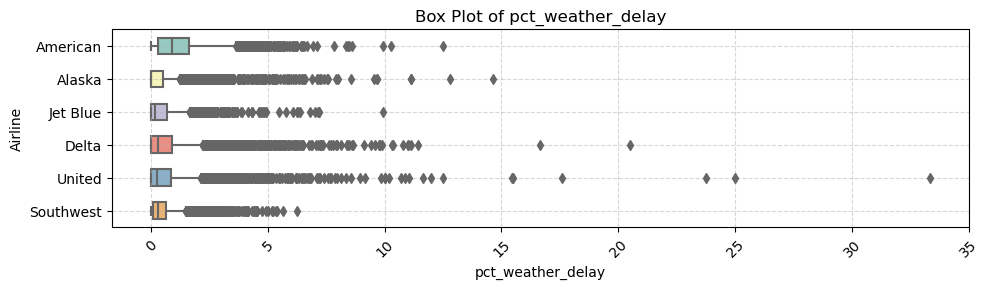

Number of outliers: 2181


In [89]:
features = ['pct_carrier_delay',"pct_atc_delay","pct_weather_delay"]
for feature in features:
    plt.figure(figsize=(10, 3))
    sns.boxplot(
                data = air,
                x = feature,
                #orient = "v",                       # works when 2 features are used
                palette = "Set3",
                width = .5,
                )
    plt.title('Box Plot of '+feature)
    plt.xlabel(feature )
    #plt.ylabel('percentage')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

    plt.figure(figsize=(10, 3))
    sns.boxplot(
                data = air,
                x = feature,
                y = 'airline',
                #orient = "v",                       # works when 2 features are used and both are numeric
                palette = "Set3",
                width = .5,
                )
    plt.title('Box Plot of '+feature)
    plt.xlabel(feature )
    plt.ylabel('Airline')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

    #--- outliers ---

    Q1 = air[feature].quantile(0.25)
    Q3 = air[feature].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Find outliers
    outliers = (air[feature] < Q1 - 1.5 * IQR) | (air[feature] > Q3 + 1.5 * IQR)

    # Count outliers
    outliers_count = outliers.sum()

    print("Number of outliers:", outliers_count)

# Analysis - Boxplot

1. Comparitively weather has least effect on delay compared to other 2 features
2. From the carrier delay boxplot the airlines alaska,jetblue,southwest are most of the times <30% affected by carrier delay, whereas there are few times where the whole delay was done by airline carrier in united,delta
3. Even though atc,carrier features has high values we can say most of time it is carrier based delay